In [ ]:
!pip install qiskit ipywidgets
!pip install qiskit[visualization]
!pip install qiskit_machine_learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=a5bc1fb1dd8b6b81a1f3bd7cd27db050e17dbc379aaa3dde6e33b46325160d29
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00

In [ ]:
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)
%cd '/content/drive/My Drive/Colab Notebooks/'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Import the dataset using Seaborn library
##iris=pd.read_csv('IRIS.csv')

from sklearn.datasets import load_iris

iris_data = load_iris()

features = iris_data.data
labels = iris_data.target

In [ ]:
## Checking the dataset
##iris.head()

from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [ ]:
## Creating a pairplot to visualize the similarities and especially difference between the species
##sns.pairplot(data=iris, hue='species', palette='Set2')

import pandas as pd
import seaborn as sns

df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df["class"] = pd.Series(iris_data.target)

sns.pairplot(df, hue="class", palette="tab10")

#Classical ML

Prepare the Data

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
iris['species']= label_encoder.fit_transform(iris['species'])

iris['species'].unique() # replace species names with numberical value

In [ ]:
# Separating the independent variables from dependent variables
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]

y.to_string('iris_labels.txt', index=False, header=False)
x.to_string('iris_data.txt', index=False, header=False)

In [ ]:
import numpy as np

x=np.loadtxt('iris_data.txt')
y=np.loadtxt('iris_labels.txt')

In [ ]:
from sklearn.model_selection import train_test_split
from qiskit.utils import algorithm_globals

algorithm_globals.random_seed = 123

x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=0.30)

In [ ]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
x_train, x_test, y_train, y_test = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

##SVC
Support Vector Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC()
_ = svc.fit(x_train, y_train)  # suppress printing the return value

In [ ]:
#predict from model

pred=svc.predict(x_test)

In [ ]:
# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.86      1.00      0.92         6
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
train_score_c4 = svc.score(x_train,y_train)
test_score_c4 = svc.score(x_test, y_test)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.99
Classical SVC on the test dataset:     0.97


##QVC
variational quantum classifier

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


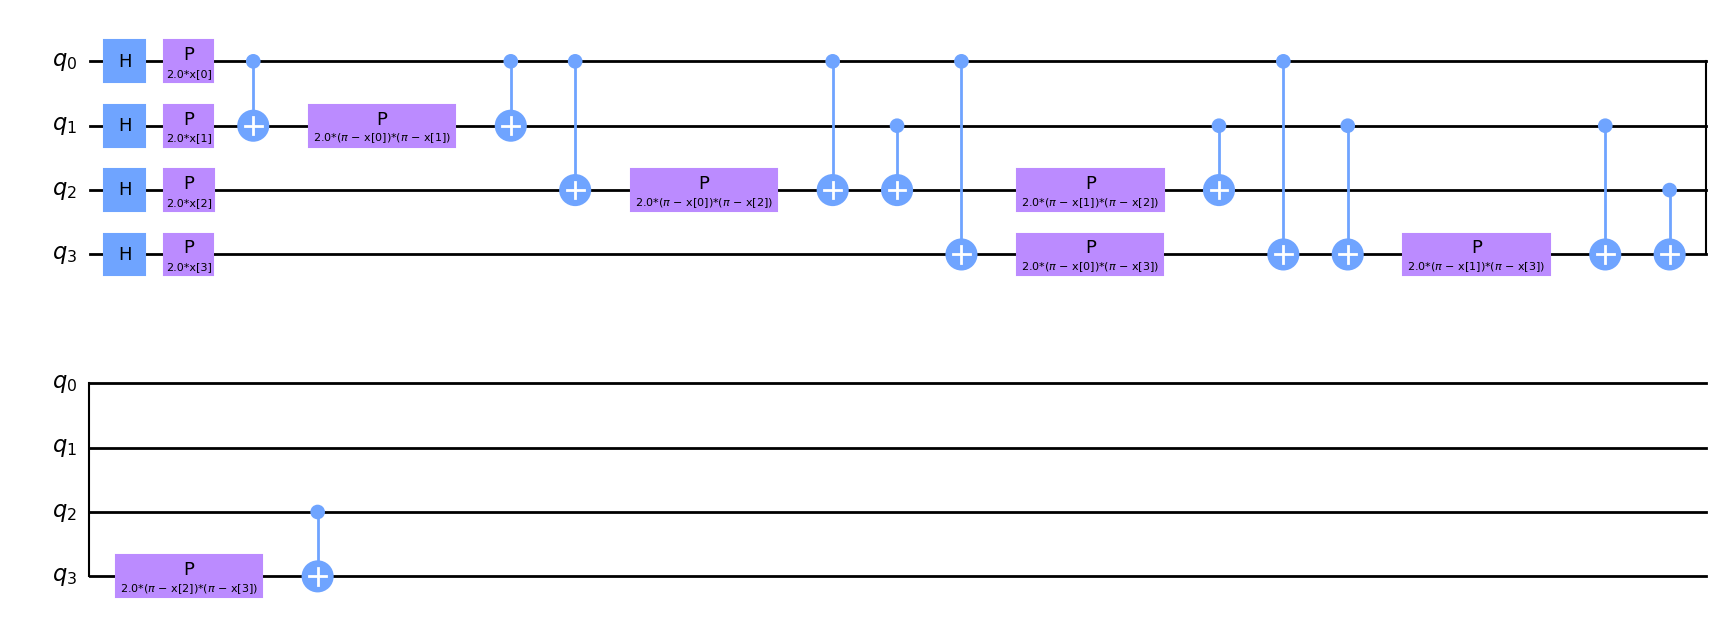

In [ ]:
from qiskit.circuit.library import ZZFeatureMap

num_features = x_train.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output='mpl')

Anstaz

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


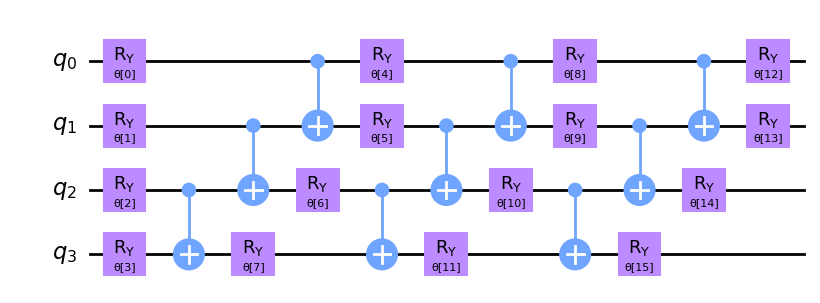

In [ ]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output='mpl')

Optimizer

In [ ]:
from qiskit.algorithms.optimizers import COBYLA

optimizer = COBYLA(maxiter=150)

<ipython-input-18-1a4cd6face38>:1: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


In [ ]:
from qiskit.primitives import Sampler

sampler = Sampler()

In [ ]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

VQC

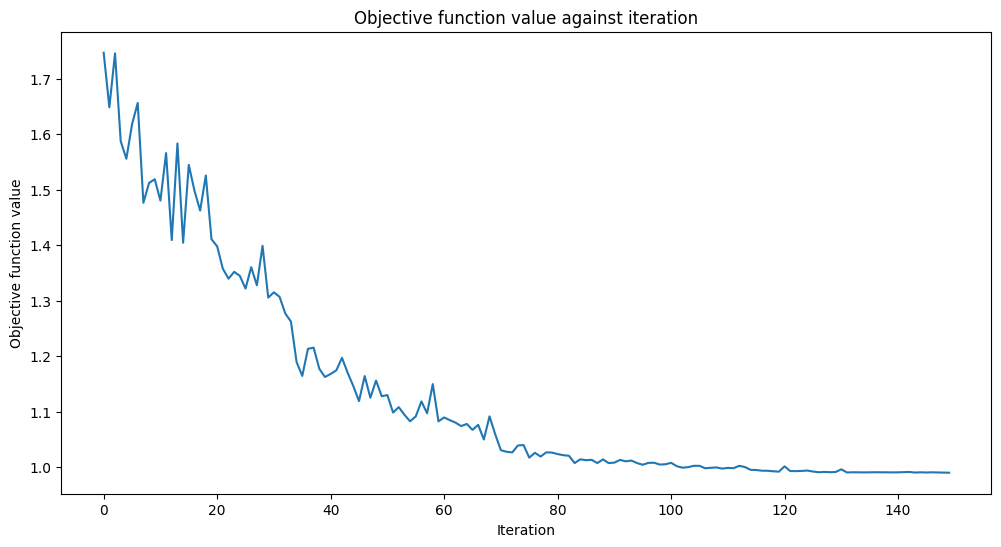

Training time: 225 seconds


In [ ]:
import time
from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(x_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q4 = vqc.score(x_train, y_train)
test_score_q4 = vqc.score(x_test, y_test)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.88
Quantum VQC on the test dataset:     0.83


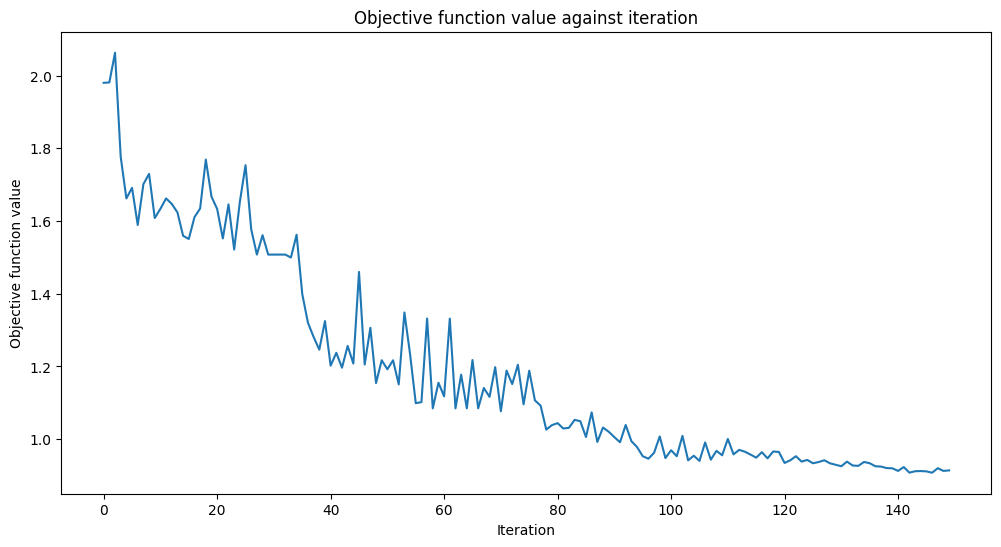

Training time: 231 seconds


In [ ]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=150)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(x_train, y_train)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [ ]:
train_score_q2_eff = vqc.score(x_train, y_train)
test_score_q2_eff = vqc.score(x_test, y_test)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.90
Quantum VQC on the test dataset using EfficientSU2:     0.87
